# Load Data

In [1]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/Bangkit/Capstone Project/dataset_courses.csv'

df = pd.read_csv(path)
df.head()

,course_url,course_name,learning_product_type,course_provided_by,course_rating,course_rated_by,enrolled_student_count,course_difficulty,skills,description,percentage_of_new_career_starts,percentage_of_pay_increase_or_promotion,estimated_time_to_complete,instructors
0,https://www.coursera.org/professional-certific...,IBM Data Science,PROFESSIONAL CERTIFICATE,IBM,4.6,51792.0,500000.0,Beginner,"['Data Science', 'Machine Learning', 'Python P...",Data Science has been ranked as one of the hot...,46.0,19.0,10 months,"['Joseph Santarcangelo', 'Alex Aklson', 'Rav A..."
1,https://www.coursera.org/specializations/intro...,Introduction to Data Science,SPECIALIZATION,IBM,4.6,40336.0,320000.0,Beginner,"['Data Science', 'Python Programming', 'Rstudi...",In this Specialization learners will develop f...,46.0,19.0,4 months,"['Alex Aklson', 'Rav Ahuja', 'Romeo Kienzler',..."
2,https://www.coursera.org/specializations/python,Python for Everybody,SPECIALIZATION,University of Michigan,4.8,135354.0,1500000.0,Beginner,"['Json', 'Xml', 'Python Programming', 'Databas...",This Specialization builds on the success of t...,39.0,19.0,8 months,['Charles Russell SeveranceTop Instructor']
3,https://www.coursera.org/professional-certific...,Google IT Support,PROFESSIONAL CERTIFICATE,Google,4.8,38906.0,380000.0,Beginner,"['Binary Code', 'Customer Support', 'Linux', '...","This 5-course certificate, developed by Google...",NaN,NaN,8 months,['GoogleTop Instructor']
4,https://www.coursera.org/specializations/deep-...,Deep Learning,SPECIALIZATION,deeplearning.ai,4.8,92961.0,720000.0,Intermediate,"['Tensorflow', 'Convolutional Neural Network',...","If you want to break into AI, this Specializat...",41.0,14.0,4 months,"['Andrew NgTop Instructor', 'Head Teaching Ass..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   course_url                               1000 non-null   object 
 1   course_name                              1000 non-null   object 
 2   learning_product_type                    1000 non-null   object 
 3   course_provided_by                       1000 non-null   object 
 4   course_rating                            999 non-null    float64
 5   course_rated_by                          999 non-null    float64
 6   enrolled_student_count                   991 non-null    float64
 7   course_difficulty                        1000 non-null   object 
 8   skills                                   1000 non-null   object 
 9   description                              1000 non-null   object 
 10  percentage_of_new_career_starts          244 non-

#Exploratory Data Analysis

In [4]:
df.describe()

,course_rating,course_rated_by,enrolled_student_count,percentage_of_new_career_starts,percentage_of_pay_increase_or_promotion
count,999.000000,999.000000,9.910000e+02,244.000000,244.000000
mean,4.675576,3538.677678,9.430252e+04,51.250000,30.704918
std,0.165344,10024.301599,1.929221e+05,13.714273,14.938661
min,2.800000,9.000000,1.800000e+03,14.000000,10.000000
25%,4.600000,439.500000,1.800000e+04,43.000000,19.000000
50%,4.700000,1070.000000,4.400000e+04,50.000000,25.000000
75%,4.800000,2817.000000,1.000000e+05,60.000000,45.000000
max,5.000000,137094.000000,3.200000e+06,86.000000,75.000000


In [7]:
#Top Course by rating
df.sort_values('course_rating', ascending=False).head(10)

,course_url,course_name,learning_product_type,course_provided_by,course_rating,course_rated_by,enrolled_student_count,course_difficulty,skills,description,percentage_of_new_career_starts,percentage_of_pay_increase_or_promotion,estimated_time_to_complete,instructors
783,https://www.coursera.org/learn/legaltech,El Abogado del Futuro: Legaltech y la Transfor...,COURSE,Universidad Austral,5.0,21.0,2100.0,Beginner,['Missing'],La revolución digital cambió nuestra manera de...,NaN,NaN,16 hours,['Federico Ast']
351,https://www.coursera.org/specializations/gis-m...,"GIS, Mapping, and Spatial Analysis",SPECIALIZATION,University of Toronto,4.9,466.0,15000.0,Beginner,"['Geographic Information System (GIS)', 'Carto...",This Specialization is for those new to mappin...,NaN,NaN,6 months,['Don BoyesTop Instructor']
543,https://www.coursera.org/learn/troubles-spectr...,Troubles du spectre de l'autisme : diagnostic,COURSE,University of Geneva,4.9,171.0,5700.0,Intermediate,['Missing'],Qu’est-ce que l’autisme ?Comment reconnaître l...,NaN,NaN,27 hours,"['Aurélie Bochet', 'Martin Debbané', 'Stephan ..."
484,https://www.coursera.org/professional-certific...,Soporte de Tecnologías de la Información de Go...,PROFESSIONAL CERTIFICATE,Crece con Google,4.9,956.0,9500.0,Beginner,"['Linux', 'Código binario', 'Solución de probl...","Este certificado, compuesto por cinco cursos y...",NaN,NaN,8 months,['GoogleTop Instructor']
131,https://www.coursera.org/learn/deep-neural-net...,Improving Deep Neural Networks: Hyperparameter...,COURSE,deeplearning.ai,4.9,48687.0,280000.0,Beginner,"['Hyperparameter', 'Tensorflow', 'Hyperparamet...","This course will teach you the ""magic"" of gett...",NaN,NaN,18 hours,"['Andrew NgTop Instructor', 'Head Teaching Ass..."
954,https://www.coursera.org/learn/constitution,Introduction to Key Constitutional Concepts an...,COURSE,University of Pennsylvania,4.9,669.0,21000.0,Beginner,['Missing'],This course offers an introduction to the U.S....,NaN,NaN,6 hours,"['Professor Kermit Roosevelt', ' III']"
123,https://www.coursera.org/learn/google-cbrs-cpi...,Become a CBRS Certified Professional Installer...,COURSE,Google - Spectrum Sharing,4.9,59.0,82000.0,Mixed,['Missing'],"This six-module program, developed by Google, ...",NaN,NaN,3 hours,['Google']
117,https://www.coursera.org/learn/python-data,Python Data Structures,COURSE,University of Michigan,4.9,55027.0,450000.0,Mixed,"['Python Syntax And Semantics', 'Data Structur...",This course will introduce the core data struc...,NaN,NaN,19 hours,['Charles Russell SeveranceTop Instructor']
516,https://www.coursera.org/learn/dino101,Dino 101: Dinosaur Paleobiology,COURSE,University of Alberta,4.9,1562.0,36000.0,Beginner,"['Biodiversity', 'Biology', 'Evolution', 'Pale...",Dino 101: Dinosaur Paleobiology is a 12-lesson...,NaN,NaN,16 hours,"['Philip John Currie', ' PhD']"
111,https://www.coursera.org/learn/excel-essentials,Excel Skills for Business: Essentials,COURSE,Macquarie University,4.9,13748.0,220000.0,Beginner,"['Graphs', 'Spreadsheet', 'Microsoft Excel', '...",In this first course of the specialization Exc...,NaN,NaN,22 hours,['A/Professor Yvonne Breyer']


In [8]:
#Top Course by enrolled student
df.sort_values('enrolled_student_count', ascending=False).head(10)

,course_url,course_name,learning_product_type,course_provided_by,course_rating,course_rated_by,enrolled_student_count,course_difficulty,skills,description,percentage_of_new_career_starts,percentage_of_pay_increase_or_promotion,estimated_time_to_complete,instructors
6,https://www.coursera.org/learn/machine-learning,Machine Learning,COURSE,Stanford University,4.9,137094.0,3200000.0,Mixed,"['Logistic Regression', 'Artificial Neural Net...",Machine learning is the science of getting com...,NaN,NaN,54 hours,['Andrew NgTop Instructor']
5,https://www.coursera.org/learn/the-science-of-...,The Science of Well-Being,COURSE,Yale University,4.9,10580.0,2600000.0,Mixed,"['Gratitude', 'Happiness', 'Meditation', 'Savo...",In this course you will engage in a series of ...,NaN,NaN,19 hours,['Laurie SantosTop Instructor']
113,https://www.coursera.org/learn/learning-how-to...,Learning How to Learn: Powerful mental tools t...,COURSE,McMaster University,4.8,58676.0,2300000.0,Mixed,"['Test Preparation', 'Learning To Learn', 'Pom...",This course gives you easy access to the inval...,NaN,NaN,15 hours,"['Dr. Barbara OakleyTop Instructor', 'Dr. Terr..."
2,https://www.coursera.org/specializations/python,Python for Everybody,SPECIALIZATION,University of Michigan,4.8,135354.0,1500000.0,Beginner,"['Json', 'Xml', 'Python Programming', 'Databas...",This Specialization builds on the success of t...,39.0,19.0,8 months,['Charles Russell SeveranceTop Instructor']
49,https://www.coursera.org/learn/python,Programming for Everybody (Getting Started wit...,COURSE,University of Michigan,4.8,115273.0,1400000.0,Mixed,"['Python Syntax And Semantics', 'Basic Program...",This course aims to teach everyone the basics ...,NaN,NaN,19 hours,['Charles Russell SeveranceTop Instructor']
12,https://www.coursera.org/specializations/jhu-d...,Data Scientist,SPECIALIZATION,Johns Hopkins University,4.5,37117.0,850000.0,Beginner,"['Github', 'Machine Learning', 'R Programming'...","Ask the right questions, manipulate data sets,...",43.0,19.0,11 months,"['Jeff Leek', ' PhD', 'Roger D. Peng', ' PhD',..."
53,https://www.coursera.org/specializations/caree...,Career Success,SPECIALIZATION,"University of California, Irvine",4.4,20975.0,800000.0,Beginner,"['Project Management', 'Information Technology...","This series of courses will help you build, de...",61.0,33.0,11 months,"['Sue Robins', ' M.S. Ed.', 'Margaret Meloni'..."
194,https://www.coursera.org/learn/careerdevelopment,English for Career Development,COURSE,University of Pennsylvania,4.8,5434.0,800000.0,Mixed,"['Communication', 'English Language', 'Career ...","Welcome to English for Career Development, a c...",NaN,NaN,40 hours,"['Brian McManusTop Instructor', 'Robyn TurnerT..."
45,https://www.coursera.org/learn/negotiation-skills,Successful Negotiation: Essential Strategies a...,COURSE,University of Michigan,4.8,9060.0,770000.0,Mixed,"['Strategic Negotiations', 'Communication', 'N...",We all negotiate on a daily basis. On a person...,NaN,NaN,16 hours,['George Siedel']
17,https://www.coursera.org/specializations/data-...,Data Science: Foundations using R,SPECIALIZATION,Johns Hopkins University,4.6,35094.0,760000.0,Beginner,"['Data Science', 'Machine Learning', 'Github',...","Ask the right questions, manipulate data sets,...",39.0,15.0,5 months,"['Jeff Leek', ' PhD', 'Roger D. Peng', ' PhD',..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


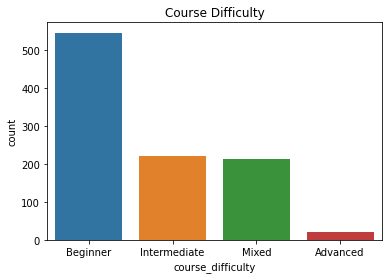

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['course_difficulty'])
plt.title('Course Difficulty')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


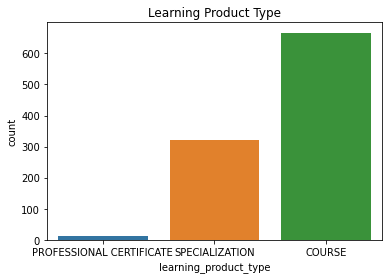

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['learning_product_type'])
plt.title('Learning Product Type')
plt.show()

# Recommend Course

In [12]:
#Import TfIdfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Remove all english stop words
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN
df['description'] = df['description'].fillna('')

#Construct TF-IDF matrix by fitting and transforming the data
matrix_tfidf = tfidf.fit_transform(df['description'])

#shape of matrix_tfidf
print(matrix_tfidf.shape)

(1000, 13757)


In [14]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(matrix_tfidf, matrix_tfidf)

#Build indices and course titles
indices = pd.Series(df.index, index=df['course_name']).drop_duplicates()

indices[:5]

course_name
IBM Data Science                0
Introduction to Data Science    1
Python for Everybody            2
Google IT Support               3
Deep Learning                   4
dtype: int64

In [20]:
#course course_name as input and outputs most similar courses
def recomendation_course(course_name, similarity=cosine_sim):
    #Get the index of the course that matches the course_name
    idx = indices[course_name]

    #Pairwsie similarity scores of all courses with that course
    similar_courses = list(enumerate(similarity[idx]))

    # Sort the courses
    similar_courses = sorted(similar_courses, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar corurses
    similar_courses = similar_courses[1:11]

    # Get the course indices
    indices_course = [i[0] for i in similar_courses]

    # Return the top 10 most similar courses
    return df[['course_url','course_name']].iloc[indices_course]

In [21]:
recomendation_course('Cloud Architect')

,course_url,course_name
9,https://www.coursera.org/professional-certific...,Cloud Engineering with Google Cloud
13,https://www.coursera.org/professional-certific...,Data Engineering with Google Cloud
89,https://www.coursera.org/learn/gcp-fundamentals,Google Cloud Platform Fundamentals: Core Infra...
21,https://www.coursera.org/specializations/secur...,Security in Google Cloud Platform
452,https://www.coursera.org/learn/introduction-to...,Introduction to Cloud Computing
325,https://www.coursera.org/learn/gcp-infrastruct...,Essential Google Cloud Infrastructure: Foundation
178,https://www.coursera.org/learn/gcp-big-data-ml...,Google Cloud Platform Big Data and Machine Lea...
607,https://www.coursera.org/learn/business-transf...,Business Transformation with Google Cloud
851,https://www.coursera.org/learn/cloud-computing...,Cloud Computing Basics (Cloud 101)
688,https://www.coursera.org/learn/google-cloud-ja...,Building Scalable Java Microservices with Spri...
